**EURO 2024**

1. Importing Libraries

In [1]:
# 1. Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2. Data Loading and Cleaning

In [2]:
# 2. Data Loading and Cleaning
# Load the data
data = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/results.csv')

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a new column to identify friendly matches
data['is_friendly'] = data['tournament'] == 'Friendly'

# List of Euro 2024 teams
euro_2024_teams = [
    'Germany', 'France', 'Italy', 'Spain', 'England', 'Portugal', 
    'Netherlands', 'Belgium', 'Switzerland', 'Denmark', 'Croatia', 
    'Austria', 'Poland', 'Ukraine', 'Turkey', 'Czech Republic', 
    'Scotland', 'Hungary', 'Slovakia', 'Romania', 'Serbia', 
    'Georgia', 'Slovenia','Albania' 
]

# Filter data for the last 5 years (from 2019 to 2024)
filtered_data = data[data['date'] >= '2019-01-01']

# Filter data to include only matches involving Euro 2024 teams
filtered_data = filtered_data[
    (filtered_data['home_team'].isin(euro_2024_teams)) & 
    (filtered_data['away_team'].isin(euro_2024_teams))
]

# Select relevant columns
filtered_data = filtered_data[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'is_friendly']]

# Goal Difference
filtered_data['goal_difference'] = filtered_data['home_score'] - filtered_data['away_score']

# Result
filtered_data['result'] = filtered_data.apply(lambda row: 'Home Win' if row['home_score'] > row['away_score'] 
                                              else ('Away Win' if row['home_score'] < row['away_score'] 
                                                    else 'Draw'), axis=1)

3. Feature Engineering

In [3]:
# 3. Feature Engineering
# Assign weights based on match type (tournament = 1, friendly = 0.5)
filtered_data['match_weight'] = filtered_data['is_friendly'].apply(lambda x: 0.5 if x else 1.0)

# Team Performance Metrics with weights
# Weighted average goals scored for home and away teams
home_goals_avg = (filtered_data.groupby('home_team').apply(
    lambda x: np.average(x['home_score'], weights=x['match_weight']))).rename('avg_home_goals')

away_goals_avg = (filtered_data.groupby('away_team').apply(
    lambda x: np.average(x['away_score'], weights=x['match_weight']))).rename('avg_away_goals')

# Weighted win percentage for home and away teams
home_wins = filtered_data[filtered_data['result'] == 'Home Win'].groupby('home_team')['match_weight'].sum()
away_wins = filtered_data[filtered_data['result'] == 'Away Win'].groupby('away_team')['match_weight'].sum()

# Total matches with weights
total_home_matches = filtered_data.groupby('home_team')['match_weight'].sum()
total_away_matches = filtered_data.groupby('away_team')['match_weight'].sum()

# Win percentage calculations
home_win_pct = (home_wins / total_home_matches).fillna(0).rename('home_win_pct')
away_win_pct = (away_wins / total_away_matches).fillna(0).rename('away_win_pct')

# Merge performance metrics back into the dataset
filtered_data = filtered_data.merge(home_goals_avg, left_on='home_team', right_index=True, how='left')
filtered_data = filtered_data.merge(away_goals_avg, left_on='away_team', right_index=True, how='left')
filtered_data = filtered_data.merge(home_win_pct, left_on='home_team', right_index=True, how='left')
filtered_data = filtered_data.merge(away_win_pct, left_on='away_team', right_index=True, how='left')

# Euro 2024 Teams Winning Percentage Calculation
total_win_pct = pd.DataFrame()
total_win_pct['team'] = euro_2024_teams

# Combine home and away win percentages
total_win_pct = total_win_pct.merge(home_win_pct, left_on='team', right_index=True, how='left')
total_win_pct = total_win_pct.merge(away_win_pct, left_on='team', right_index=True, how='left')

# Calculate the total win percentage (average of home and away win percentages)
total_win_pct['total_win_pct'] = (total_win_pct['home_win_pct'] + total_win_pct['away_win_pct']) / 2

# Sort by win percentage
total_win_pct = total_win_pct.sort_values(by='total_win_pct', ascending=False)

# Print the ranking
print("Euro 2024 Teams Winning Percentage:")
print(total_win_pct)

Euro 2024 Teams Winning Percentage:
              team  home_win_pct  away_win_pct  total_win_pct
3            Spain      0.738095      0.500000       0.619048
7          Belgium      0.629630      0.392857       0.511243
6      Netherlands      0.375000      0.608696       0.491848
1           France      0.514286      0.461538       0.487912
5         Portugal      0.550000      0.400000       0.475000
2            Italy      0.593750      0.342857       0.468304
9          Denmark      0.593750      0.312500       0.453125
4          England      0.520833      0.371429       0.446131
10         Croatia      0.305556      0.529412       0.417484
14          Turkey      0.500000      0.300000       0.400000
17         Hungary      0.290323      0.466667       0.378495
0          Germany      0.431818      0.269231       0.350524
11         Austria      0.214286      0.393939       0.304113
15  Czech Republic      0.423077      0.166667       0.294872
8      Switzerland      0.375000  

/tmp/ipykernel_18/2355831665.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  home_goals_avg = (filtered_data.groupby('home_team').apply(
/tmp/ipykernel_18/2355831665.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  away_goals_avg = (filtered_data.groupby('away_team').apply(


4. Exploratory Data Analysis (EDA)

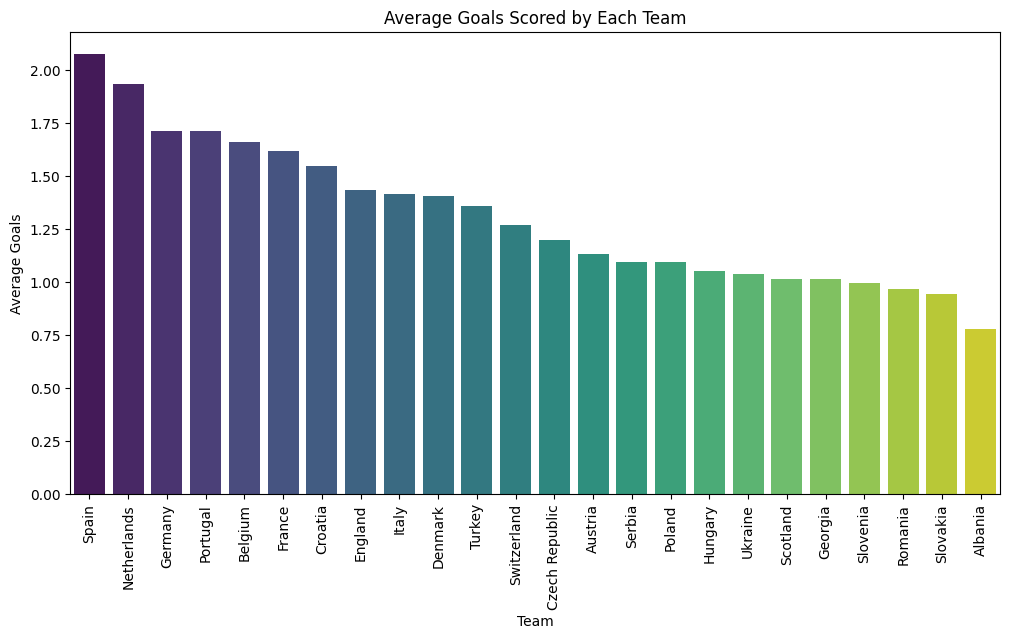

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


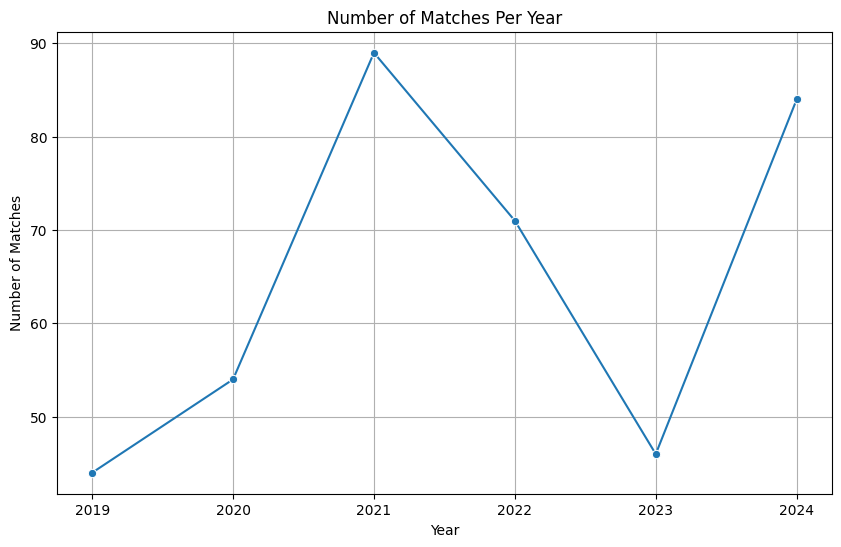

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


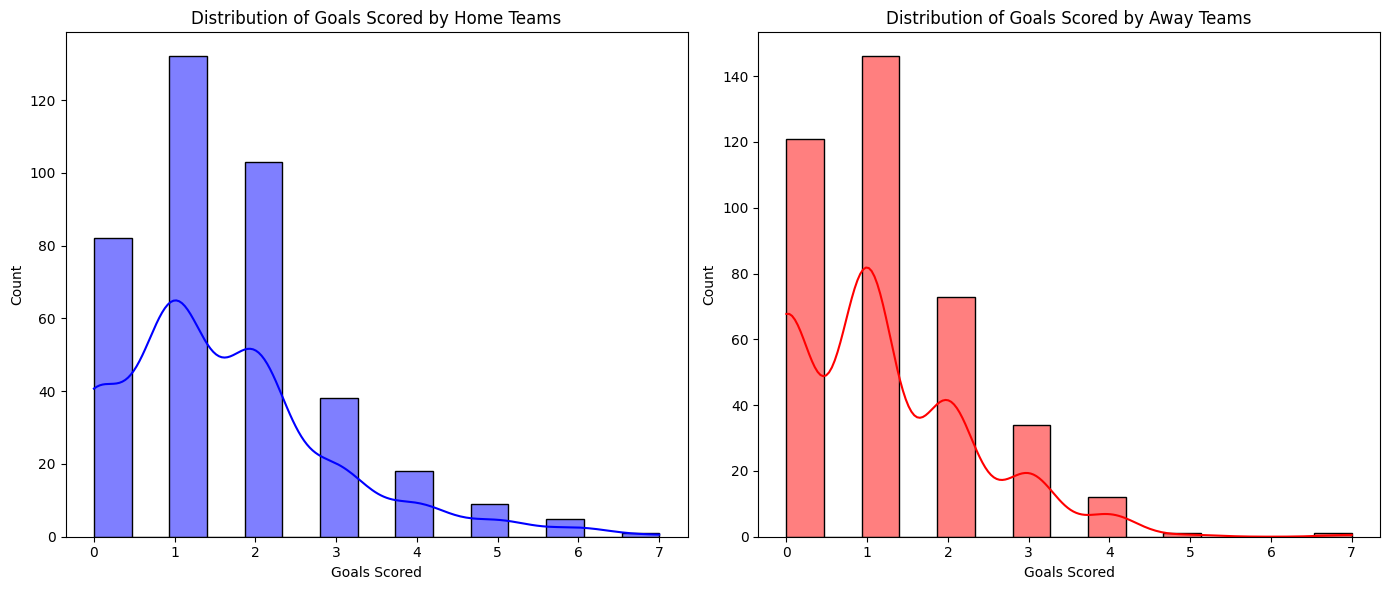

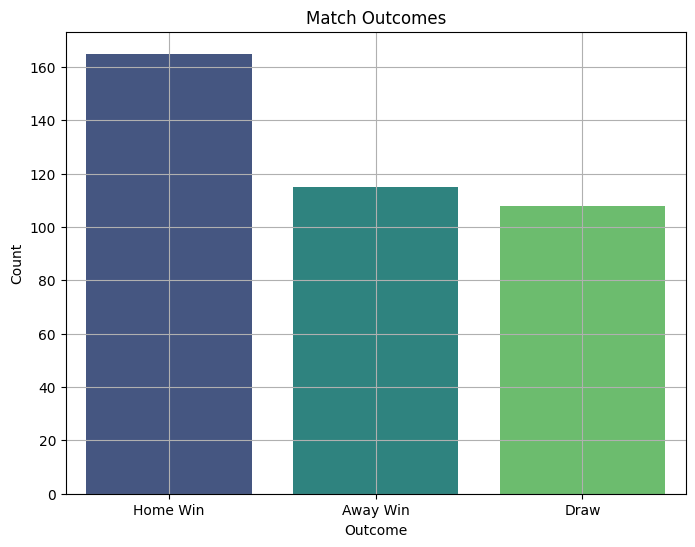

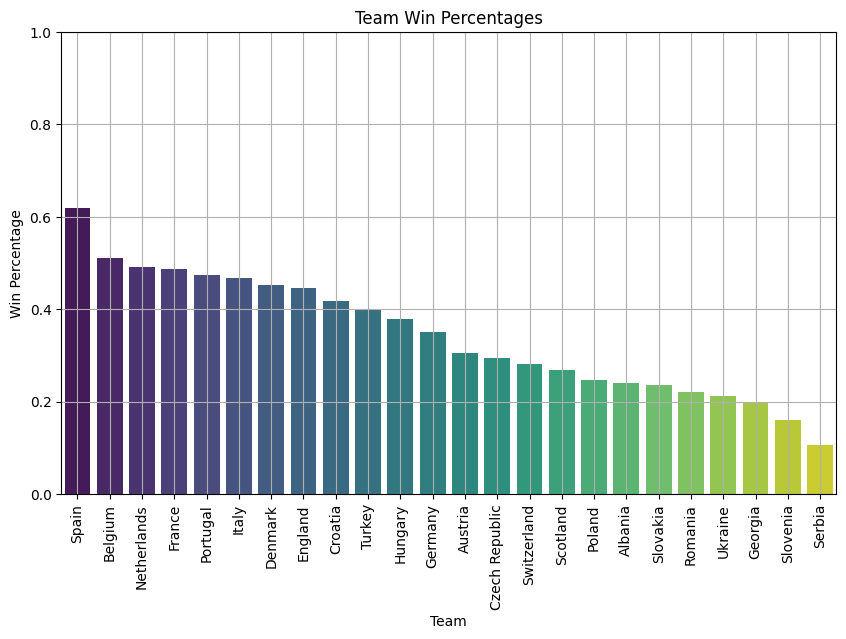

In [4]:
# Average Goals Scored by Each Team
avg_goals = pd.concat([home_goals_avg, away_goals_avg], axis=1).fillna(0)
avg_goals['total_avg_goals'] = avg_goals.mean(axis=1)

plt.figure(figsize=(12, 6))
avg_goals = avg_goals.sort_values(by='total_avg_goals', ascending=False)
sns.barplot(x=avg_goals.index, y=avg_goals['total_avg_goals'], palette='viridis')
plt.title('Average Goals Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Average Goals')
plt.xticks(rotation=90)
plt.show()

# Plot the number of matches per year
filtered_data['year'] = filtered_data['date'].dt.year
matches_per_year = filtered_data['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values, marker='o')
plt.title('Number of Matches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

# Distribution of goals scored by home and away teams
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(filtered_data['home_score'], kde=True, bins=15, color='blue')
plt.title('Distribution of Goals Scored by Home Teams')
plt.xlabel('Goals Scored')

plt.subplot(1, 2, 2)
sns.histplot(filtered_data['away_score'], kde=True, bins=15, color='red')
plt.title('Distribution of Goals Scored by Away Teams')
plt.xlabel('Goals Scored')

plt.tight_layout()
plt.show()

# Match outcomes
outcome_counts = filtered_data['result'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')
plt.title('Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Visualize team win percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=total_win_pct['team'], y=total_win_pct['total_win_pct'], palette='viridis')
plt.title('Team Win Percentages')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.ylim(0, 1)  # Ensure the y-axis is from 0 to 1 for percentage visualization
plt.grid(True)
plt.show()

5. Save Total Win Percentages to CSV file

In [5]:
# Reorder columns to match the header
total_win_pct = total_win_pct[['team', 'home_win_pct', 'away_win_pct', 'total_win_pct']]

# Define the header for the CSV
header = ['Team', 'Home Win Percentage', 'Away Win Percentage', 'Total Win Percentage']

# Save to CSV with correct formatting
total_win_pct.to_csv('total_win_percentages.csv', index=False, header=header)

print("Total win percentages have been saved to 'total_win_percentages.csv'.")

Total win percentages have been saved to 'total_win_percentages.csv'.
